In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
df1 = pd.read_csv('C:/Users/HP/Desktop/InternSavy/Cricket Player Performaces prediction using ML/Ground_Averages.csv') 
df2 = pd.read_csv('C:/Users/HP/Desktop/InternSavy/Cricket Player Performaces prediction using ML/ODI_Match_Results.csv') 
df3 = pd.read_csv('C:/Users/HP/Desktop/InternSavy/Cricket Player Performaces prediction using ML/ODI_Match_Totals.csv') 

In [33]:
df1.head(5)


,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [34]:
df2.head(5)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [35]:
df3.head(5)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [36]:
df1.info()
print("-----------------------------------------------------------------------------------")
df2.info()
print("-----------------------------------------------------------------------------------")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ground  106 non-null    object 
 1   Span    106 non-null    object 
 2   Mat     106 non-null    int64  
 3   Won     106 non-null    int64  
 4   Tied    106 non-null    int64  
 5   NR      106 non-null    int64  
 6   Runs    106 non-null    int64  
 7   Wkts    106 non-null    int64  
 8   Balls   106 non-null    int64  
 9   Ave     106 non-null    float64
 10  RPO     106 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 9.2+ KB
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1322 non-null   int64  
 1   Result      1322 non-null   objec

In [24]:
df1.shape

(106, 11)

In [25]:
df2.shape

(1322, 12)

In [37]:
df3.shape

(1296, 13)

In [38]:
df1.isnull().sum()

Ground    0
Span      0
Mat       0
Won       0
Tied      0
NR        0
Runs      0
Wkts      0
Balls     0
Ave       0
RPO       0
dtype: int64

In [39]:
df2.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [40]:
df3.isnull().sum()

Unnamed: 0      0
Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [41]:
common = set.intersection(set(df2['Start Date']), set(df3['Start Date']))
df = pd.concat([
    df2[df2['Start Date'].isin(common)],
    df3[df3['Start Date'].isin(common)]]).sort_values(by='Start Date')

In [43]:
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,1 Aug 2013,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


In [44]:
df.isnull().sum()

Unnamed: 0       0
Result           0
Margin        1296
BR            1991
Toss          1296
Bat           1296
Opposition       0
Ground           0
Start Date       0
Match_ID         0
Country          0
Country_ID       0
Score         1301
Overs         1301
RPO           1301
Target        1977
Inns          1301
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2597 non-null   int64  
 1   Result      2597 non-null   object 
 2   Margin      1301 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1301 non-null   object 
 5   Bat         1301 non-null   object 
 6   Opposition  2597 non-null   object 
 7   Ground      2597 non-null   object 
 8   Start Date  2597 non-null   object 
 9   Match_ID    2597 non-null   object 
 10  Country     2597 non-null   object 
 11  Country_ID  2597 non-null   int64  
 12  Score       1296 non-null   object 
 13  Overs       1296 non-null   float64
 14  RPO         1296 non-null   object 
 15  Target      620 non-null    float64
 16  Inns        1296 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 365.2+ KB


In [46]:
#Converting Start Date column to Time and Date datatype 
df['Start Date']= pd.to_datetime(df['Start Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2597 non-null   int64         
 1   Result      2597 non-null   object        
 2   Margin      1301 non-null   object        
 3   BR          606 non-null    float64       
 4   Toss        1301 non-null   object        
 5   Bat         1301 non-null   object        
 6   Opposition  2597 non-null   object        
 7   Ground      2597 non-null   object        
 8   Start Date  2597 non-null   datetime64[ns]
 9   Match_ID    2597 non-null   object        
 10  Country     2597 non-null   object        
 11  Country_ID  2597 non-null   int64         
 12  Score       1296 non-null   object        
 13  Overs       1296 non-null   float64       
 14  RPO         1296 non-null   object        
 15  Target      620 non-null    float64       
 16  Inns        1296 non-nu

In [47]:
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,2013-08-01,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


Things we can do with df: Gather data induvidually based on Opposition, Ground

Result vs Toss
Margin vs Bat
Target, result, ground - Lowest and Highest
How many times has 'Country' won against 'Opposition' and for what score, RPO, Target

## Result vs Toss

In [49]:
#Gruping required columns for problem 1  in one dataframe
#The null values have reduced and hence the null columns can be dropped
prob1_var = df[['Toss', 'Result', 'Ground']]
prob1_var.dropna()

,Toss,Result,Ground
891,lost,won,Colombo (SSC)
892,won,lost,Colombo (SSC)
148,won,won,Bulawayo
1135,won,lost,Dambulla
1136,lost,won,Dambulla
...,...,...,...
1202,lost,won,Abu Dhabi
792,won,lost,Dhaka
793,lost,won,Dhaka
791,won,lost,Port Elizabeth


In [51]:
#Grouping the data together according to the required Stadium
prob1 = prob1_var.query('Ground == "The Oval"')
prob1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 915 to 1303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Toss    34 non-null     object
 1   Result  68 non-null     object
 2   Ground  68 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [52]:
#Gathering only the winning results from the dataframe
tempvar = prob1.loc[prob1['Result']=='won']
tvar = tempvar['Toss'].value_counts()
tvar
#this tells us that, at the oval, we More number of teams have won the match if they have won the toss

won     10
lost     5
Name: Toss, dtype: int64

## Margin vs Bat

In [53]:
#We will load the data again, so we don't have to scroll up all the time
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,2013-08-01,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


In [54]:
#We will again group the data according to Birmingham 
prob2 = df[['Bat', 'Ground', 'Opposition', 'Result']]
prob2.head()

,Bat,Ground,Opposition,Result
891,1st,Colombo (SSC),v Bangladesh,won
892,2nd,Colombo (SSC),v Sri Lanka,lost
870,NaN,Colombo (SSC),v Sri Lanka,lost
869,NaN,Colombo (SSC),v Bangladesh,won
148,2nd,Bulawayo,v Zimbabwe,won


In [55]:
#Dropping Null Values
prob2.dropna()
#Grouping According to one ground
prob2 = prob2.query('Ground == "Birmingham"')
prob2

,Bat,Ground,Opposition,Result
90,2nd,Birmingham,v South Africa,lost
88,NaN,Birmingham,v Pakistan,won
89,NaN,Birmingham,v South Africa,lost
89,1st,Birmingham,v Pakistan,won
935,2nd,Birmingham,v Australia,won
936,1st,Birmingham,v England,lost
914,NaN,Birmingham,v England,lost
913,NaN,Birmingham,v Australia,won
156,NaN,Birmingham,v Australia,n/r
157,NaN,Birmingham,v England,n/r


In [56]:
#Grouping according to whoever batted first
prob2_b1 = prob2.loc[prob2['Bat']=='1st']
prob2_b1['Result'].value_counts()

lost    7
won     5
n/r     3
Name: Result, dtype: int64

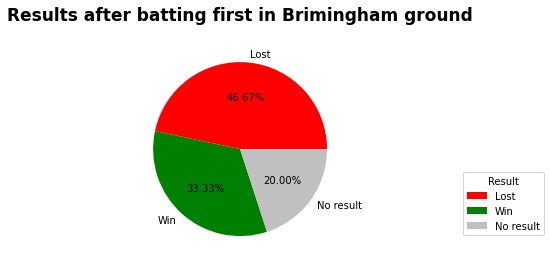

In [57]:
#plotting the graph
fig = figsize =(30, 20)
label = ['Lost', 'Win', 'No result']
colors = ['red', 'green', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting first in Brimingham ground', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5)) 

In [58]:
#Grouping the data according to second batting
prob2_b2 = prob2.loc[prob2['Bat']=='2nd']
#Counting how many of these second batters have won and lost
prob2_b2['Result'].value_counts()

won     7
lost    5
n/r     3
Name: Result, dtype: int64

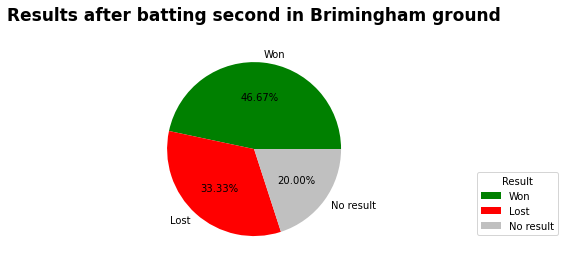

In [59]:
fig = figsize =(30, 20)
label = ['Won', 'Lost', 'No result']
colors = ['green', 'red', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting second in Brimingham ground', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))

## Target, Result, Ground

In [60]:
#Grouping the data according to reqd columns
prob3 = df[['Target', 'Result', 'Ground']]
#Dropping null values
prob3 = prob3.dropna()
prob3

,Target,Result,Ground
870,281.0,lost,Colombo (SSC)
147,145.0,won,Bulawayo
1113,245.0,won,Dambulla
400,129.0,won,Dhaka
31,71.0,won,Perth
...,...,...,...
375,243.0,won,Hyderabad (Deccan)
1179,210.0,won,Abu Dhabi
1177,232.0,lost,Adelaide
770,168.0,won,Port Elizabeth


In [61]:
#Grouping according to Matches played at Oval
prob3g = prob3.query('Ground == "The Oval"')
#Grouping according to winners at Oval
prob3g = prob3g.loc[prob3g['Result']=='won']
#Mean score of the wiining team
mean_score = prob3g['Target'].mean()
prob3g

,Target,Result,Ground
893,306.0,won,The Oval
91,234.0,won,The Oval
916,192.0,won,The Oval
94,294.0,won,The Oval
1083,215.0,won,The Oval
105,176.0,won,The Oval
967,253.0,won,The Oval
718,308.0,won,The Oval
82,171.0,won,The Oval
907,322.0,won,The Oval


In [62]:
mean_score

247.1

In [63]:
print("The Average Score for this ground is: ")
print(prob3['Target'].mean())
print("The Highest Score for this ground is: ")
print(prob3g['Target'].max())
print("The Lowest Score for this ground is: ")
print(prob3['Target'].min())

The Average Score for this ground is: 
253.44032258064516
The Highest Score for this ground is: 
322.0
The Lowest Score for this ground is: 
68.0


## Country Analysis

In [64]:
#Consider a country say India and Opposition as England
prob5 = df.query('Country == "India"')
prob5 = prob5.query('Opposition == "v England"')
prob5.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
6,694,lost,9 runs,NaN,lost,2nd,v England,Rajkot,2013-01-11,ODI # 3318,India,6,NaN,NaN,NaN,NaN,NaN
6,682,lost,NaN,NaN,NaN,NaN,v England,Rajkot,2013-01-11,ODI # 3318,India,6,316/9,50.0,6.32,326.0,2.0
1116,825,won,8 wickets,59.0,won,2nd,v England,Nottingham,2018-07-12,ODI # 4014,India,6,NaN,NaN,NaN,NaN,NaN
1093,809,won,NaN,NaN,NaN,NaN,v England,Nottingham,2018-07-12,ODI # 4014,India,6,269/2,40.1,6.69,269.0,2.0
1096,810,lost,NaN,NaN,NaN,NaN,v England,Lord's,2018-07-14,ODI # 4016,India,6,236,50.0,4.72,323.0,2.0


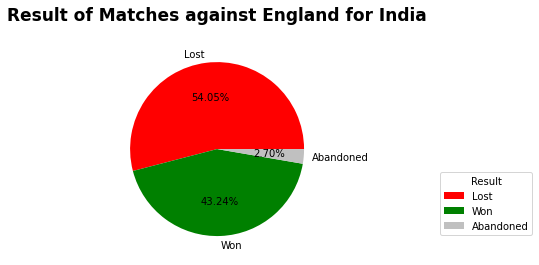

In [65]:
fig = figsize =(30, 20)
label = ['Lost', 'Won', 'Abandoned']
colors = ['red', 'Green', 'Silver']
plt.pie(prob5['Result'].value_counts(), labels=label, colors=colors,  autopct='%1.2f%%')
plt.title('Result of Matches against England for India', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))

In [84]:
df4 = pd.read_csv('C:/Users/HP/Desktop/InternSavy/Cricket Player Performaces prediction using ML/Batsman_Data.csv') 
df5 = pd.read_csv('C:/Users/HP/Desktop/InternSavy/Cricket Player Performaces prediction using ML/WC_players.csv') 
df6 = pd.read_csv('C:/Users/HP/Desktop/InternSavy/Cricket Player Performaces prediction using ML/Bowler_data.csv') 

In [85]:
df4.info()
print("-----------------------------------------------------------------------------------")
df5.info()
print("-----------------------------------------------------------------------------------")
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   -

In [86]:
df4.shape

(11149, 13)

In [87]:
df5.shape

(152, 3)

In [88]:
df6.shape

(11118, 14)

In [89]:
df4.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [90]:
df5.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [91]:
df6.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [92]:
df4.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [94]:
df5.isnull().sum()

Player     0
ID         0
Country    0
dtype: int64

In [95]:
df6.isnull().sum()

Unnamed: 0    0
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Bowler        0
Player_ID     0
dtype: int64

In [98]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [99]:

#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = df3.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            #print("i ; ",i,"--j : ",j)
            WC_Ground_Stats.append((i,j))
            

In [100]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Bristol': 'County Ground, Bristol',
 'Leeds': 'Headingley, Leeds',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Southampton': 'Rose Bowl, Southampton',
 'Birmingham': 'Edgbaston, Birmingham',
 'Manchester': 'Old Trafford, Manchester',
 'Nottingham': 'Trent Bridge, Nottingham',
 "Lord's": "Lord's, London",
 'Cardiff': 'Sophia Gardens, Cardiff',
 'The Oval': 'The Oval, London'}

In [103]:
How many WC teams have played in these venues before and what are they?

Object `they` not found.


#### How many WC teams have played in these venues before and what are they

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'SriLanka'),
  Text(5, 0, 'Newzealad'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'WestIndies'),
  Text(8, 0, 'Bangladesh')])

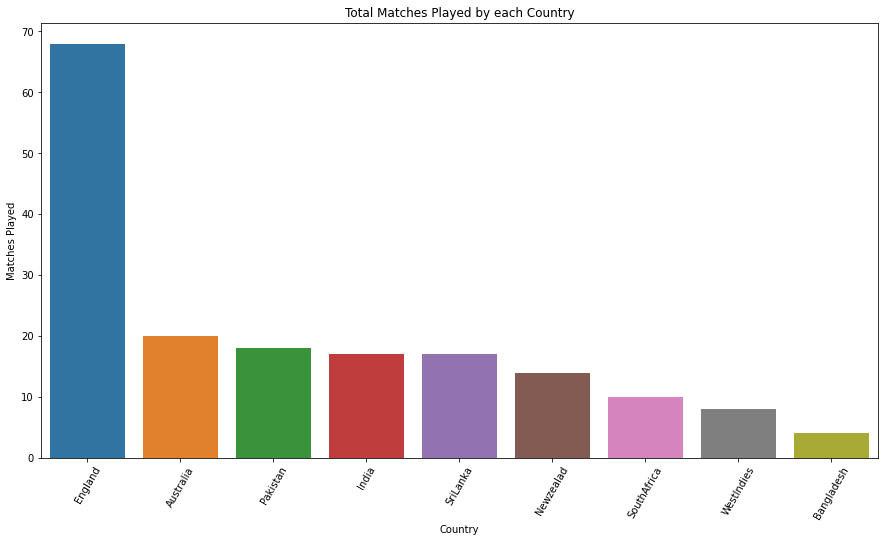

In [107]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

### Team wise Winning Percentage in England Pitches

In [109]:
WC_Grounds_History.sample(5)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
1291,549,340/7,50.0,6.80,NaN,1,lost,v England,"Trent Bridge, Nottingham",17 May 2019,ODI # 4138,Pakistan,7
1089,960,314/4,44.4,7.02,311.0,2,won,v Australia,"Riverside Ground, Chester-le-Street",21 Jun 2018,ODI # 4012,England,1
601,1134,207,44.0,4.70,301.0,2,lost,v England,"Old Trafford, Manchester",8 Sep 2015,ODI # 3682,Australia,2
899,508,164,33.4,4.87,289.0,2,lost,v India,"Edgbaston, Birmingham",4 Jun 2017,ODI # 3878,Pakistan,7
108,691,129/7,20.0,6.45,NaN,1,won,v England,"Edgbaston, Birmingham",23 Jun 2013,ODI # 3377,India,6


In [110]:
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [111]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [112]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16828\294363340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winnings["count"] = 1


,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'England'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Newzealad'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'WestIndies')])

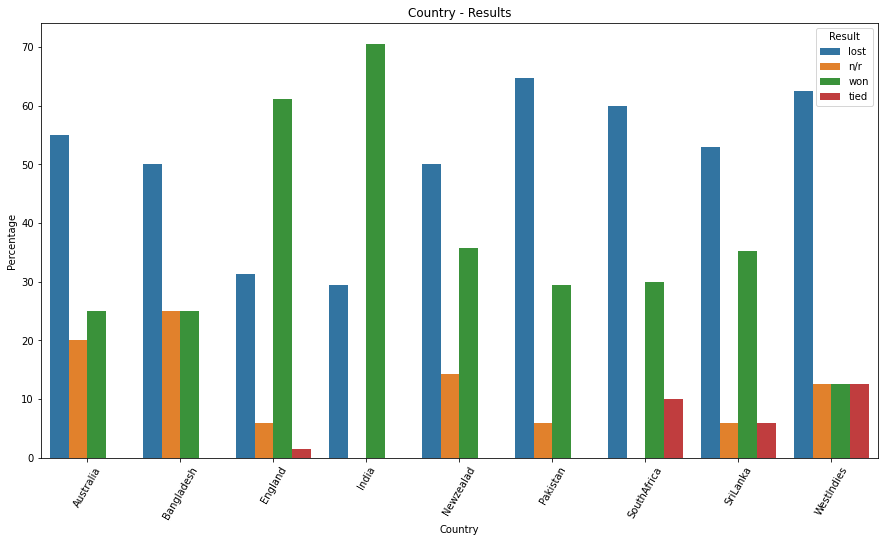

In [113]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

India and England have the highest winning percentage compared to that of other Nations.
Pakistan, South Africa, West Indies have the Highest Losing Percentage.

C:\Users\HP\AppData\Local\Temp\ipykernel_16828\2357038178.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\


Text(0.5, 0, 'England')

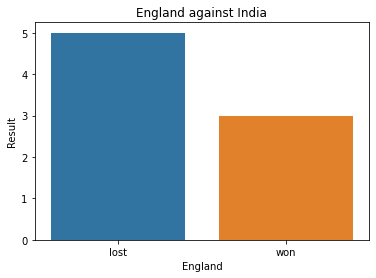

In [114]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

#### Win and Lose Percentage based on Innings wrt Stadium

In [115]:
WC_Grounds_History.sample(5)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
902,1174,83/1,16.0,5.18,183.0,2,n/r,v Bangladesh,"The Oval, London",5 Jun 2017,ODI # 3879,Australia,2
558,897,350/3,44.0,7.95,350.0,2,won,v New Zealand,"Trent Bridge, Nottingham",17 Jun 2015,ODI # 3657,England,1
88,287,234/9,50.0,4.68,NaN,1,won,v Pakistan,"Edgbaston, Birmingham",10 Jun 2013,ODI # 3367,SouthAfrica,3
156,854,59/3,15.1,3.89,NaN,1,n/r,v Australia,"Edgbaston, Birmingham",11 Sep 2013,ODI # 3414,England,1
301,160,222/4,48.2,4.59,220.0,2,won,v England,"Edgbaston, Birmingham",3 Jun 2014,ODI # 3496,SriLanka,8


Text(0, 0.5, 'Winning Percentage')

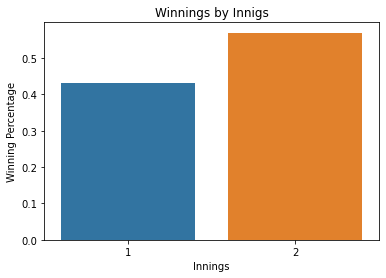

In [116]:
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innigs")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

In [117]:
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Edgbaston, Birmingham'),
  Text(2, 0, 'Headingley, Leeds'),
  Text(3, 0, "Lord's, London"),
  Text(4, 0, 'Old Trafford, Manchester'),
  Text(5, 0, 'Riverside Ground, Chester-le-Street'),
  Text(6, 0, 'Rose Bowl, Southampton'),
  Text(7, 0, 'Sophia Gardens, Cardiff'),
  Text(8, 0, 'The Oval, London'),
  Text(9, 0, 'Trent Bridge, Nottingham')])

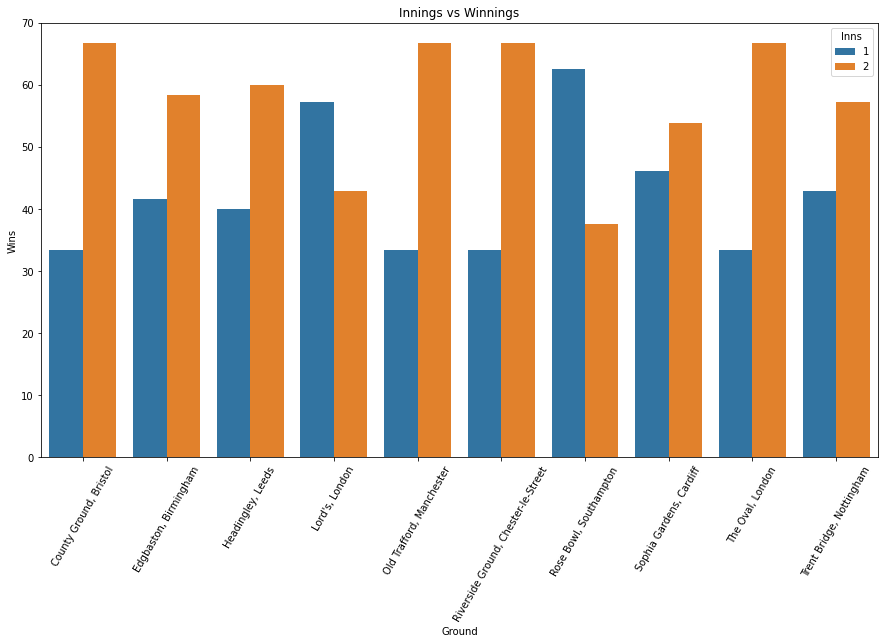

In [118]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

Teams that Bat second will Win most of the times.

In [121]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Score.str.contains("D")]

Text(0, 0.5, 'Scores')

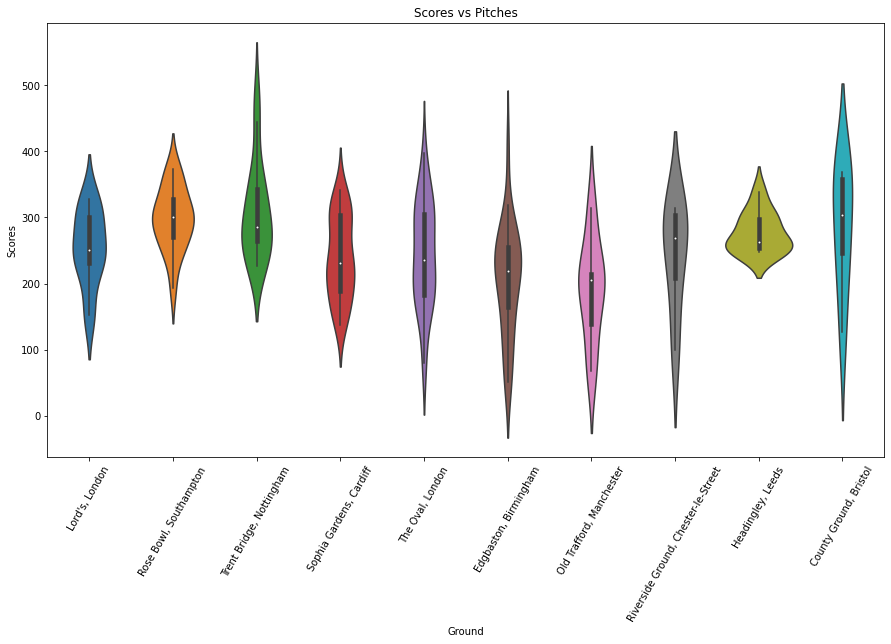

In [122]:
Scores = [int(item[0]) for item in WC_Grounds_History.Score.str.split("/")]
WC_Grounds_History["Score_without_wickets"] = Scores
Stadium_Scores = WC_Grounds_History[["Score_without_wickets","Ground"]]
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
plt.figure(figsize=(15,8))
#sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.xticks(rotation = 60)
sns.violinplot(x = "Ground", y = "Score_without_wickets",data = Stadium_Scores).set_title("Scores vs Pitches")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

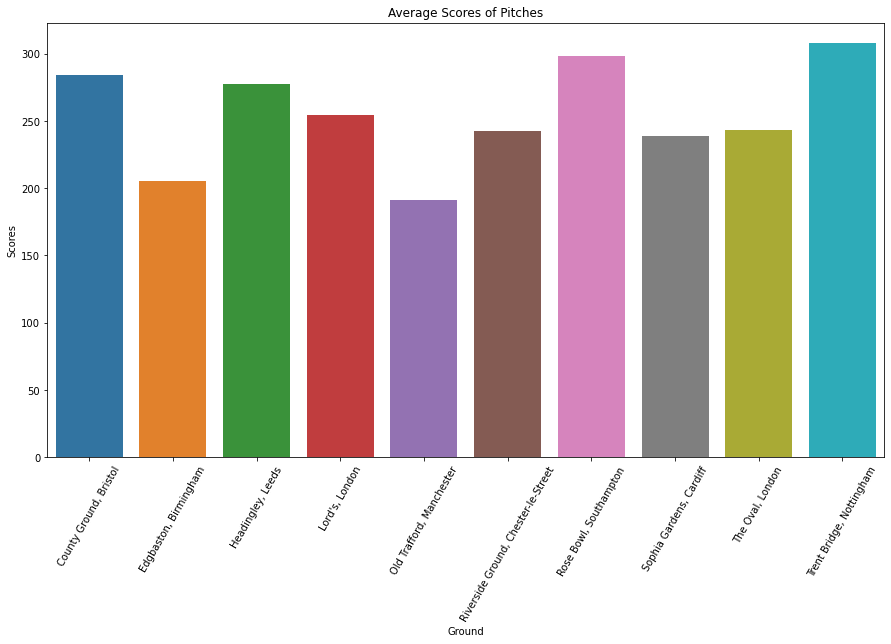

In [123]:
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
Stadium_Scores = Stadium_Scores.groupby("Ground").mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Score_without_wickets", data = Stadium_Scores).set_title("Average Scores of Pitches")
plt.xticks(rotation = 60)
plt.ylabel("Scores")

### Analyzing No.of Wickets in these Pitches

In [125]:
def no_of_wickets(value):
    if "/" not in value:
        return 10
    elif "D" in value:
        return 0
    else:
        return int(value.split("/")[1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Edgbaston, Birmingham'),
  Text(2, 0, 'Headingley, Leeds'),
  Text(3, 0, "Lord's, London"),
  Text(4, 0, 'Old Trafford, Manchester'),
  Text(5, 0, 'Riverside Ground, Chester-le-Street'),
  Text(6, 0, 'Rose Bowl, Southampton'),
  Text(7, 0, 'Sophia Gardens, Cardiff'),
  Text(8, 0, 'The Oval, London'),
  Text(9, 0, 'Trent Bridge, Nottingham')])

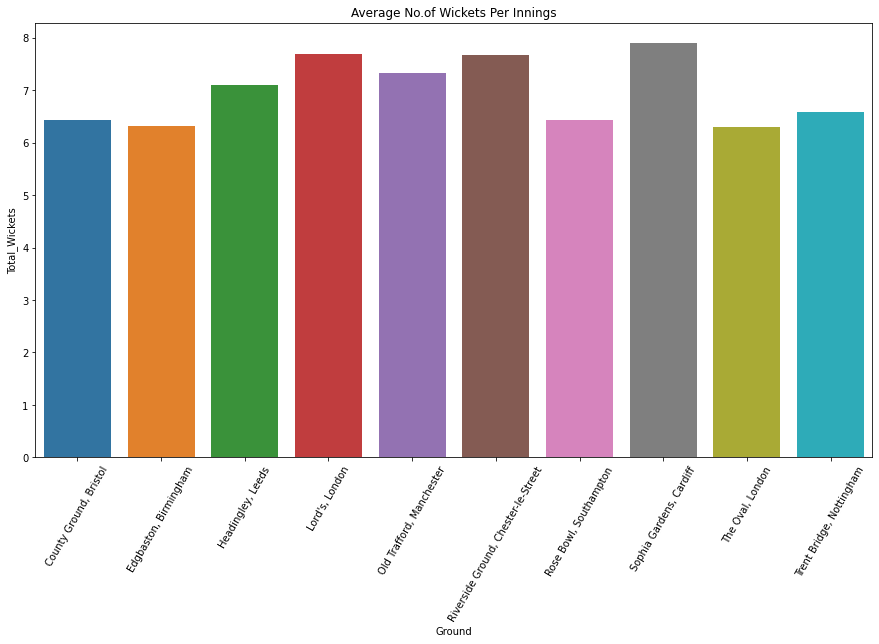

In [126]:
WC_Grounds_History["Total_Wickets"] = WC_Grounds_History.Score.apply(no_of_wickets)

Stadium_Wickets = WC_Grounds_History[["Total_Wickets","Ground"]]
Stadium_Wickets = Stadium_Wickets.groupby("Ground").mean().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Total_Wickets", data = Stadium_Wickets).set_title("Average No.of Wickets Per Innings")
plt.xticks(rotation = 60)

In [127]:
Grounds = WC_Grounds_History.Ground.unique()
WC_Teams = WC_Grounds_History.Country.unique()
Ground_Winnings = {}
for Ground in Grounds:
    Ground_Winnings.update({Ground : {}})
    for Team in WC_Teams:
        Country_Ground_Record = WC_Grounds_History[(WC_Grounds_History.Country == Team) & \
                                                   (WC_Grounds_History.Ground == Ground)]
        #print("Ground : ", Ground, "Team : ", Team)
        matches_played = len(Country_Ground_Record)
        if matches_played == 0:
            continue
        matches_won = len(Country_Ground_Record[Country_Ground_Record.Result == "won"])
        winning_percentage = matches_won / matches_played * 100
        Ground_Winnings[Ground].update({Team : {"matches_played" : matches_played,\
                                       "matches_won": matches_won,\
                                       "winning_percentage" : winning_percentage}})
Ground_Winnings["Lord's, London"]

{'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percentage': 42.857142857142854},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percentage': 0.0},
 'Pakistan': {'matches_played': 1,
  'matches_won': 0,
  'winning_percentage': 0.0},
 'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'SriLanka': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0}}

We have collected the Data according to Team wise wins in respective Stadiums. Lets plot to understand the Results

In [129]:
Data_Frame_Data = []
for Pitch, P_Data in Ground_Winnings.items():
    
    for Team, Team_Data in P_Data.items():
        inside = []
        inside.extend([Pitch,Team,Team_Data["matches_played"],\
                       Team_Data["matches_won"],Team_Data["winning_percentage"]])
        Data_Frame_Data.append(inside)

In [130]:
Columns = ["Ground", "Country","Played","Won","Win_Percentage"]
Data_Frame_Data
Pitch_Team_Winnings = pd.DataFrame(Data_Frame_Data, columns=Columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Edgbaston, Birmingham'),
  Text(6, 0, 'Old Trafford, Manchester'),
  Text(7, 0, 'Riverside Ground, Chester-le-Street'),
  Text(8, 0, 'Headingley, Leeds'),
  Text(9, 0, 'County Ground, Bristol')])

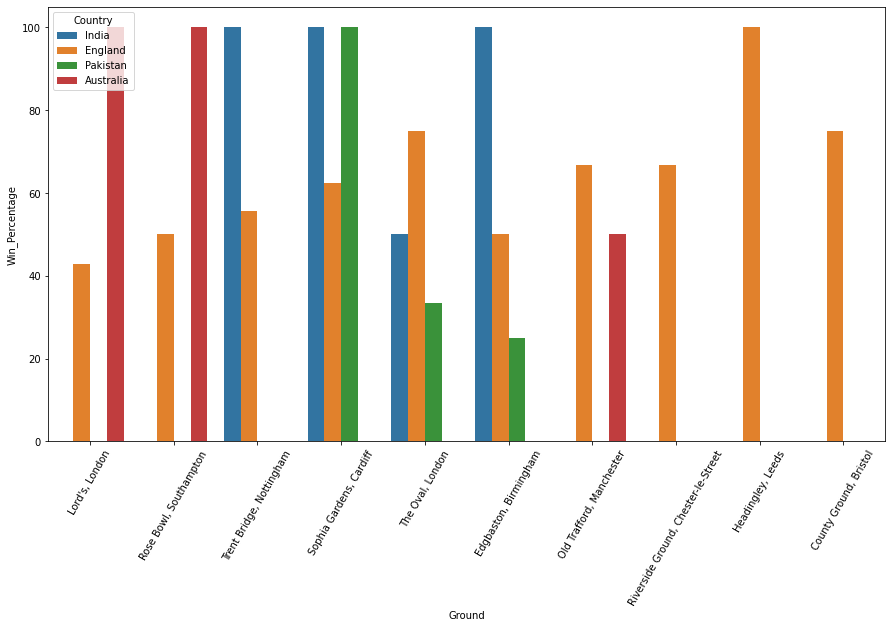

In [131]:
Pitch_Team_Winnings
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["India","England","Pakistan","Australia"])
plt.xticks(rotation = 60)

Some Nations have Winning Percentage of 0 in few Stadiums(Either they might not play or never won).      
England, India has winning percentage of 100 in few Stadiums.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Edgbaston, Birmingham'),
  Text(6, 0, 'Old Trafford, Manchester'),
  Text(7, 0, 'Riverside Ground, Chester-le-Street'),
  Text(8, 0, 'Headingley, Leeds'),
  Text(9, 0, 'County Ground, Bristol')])

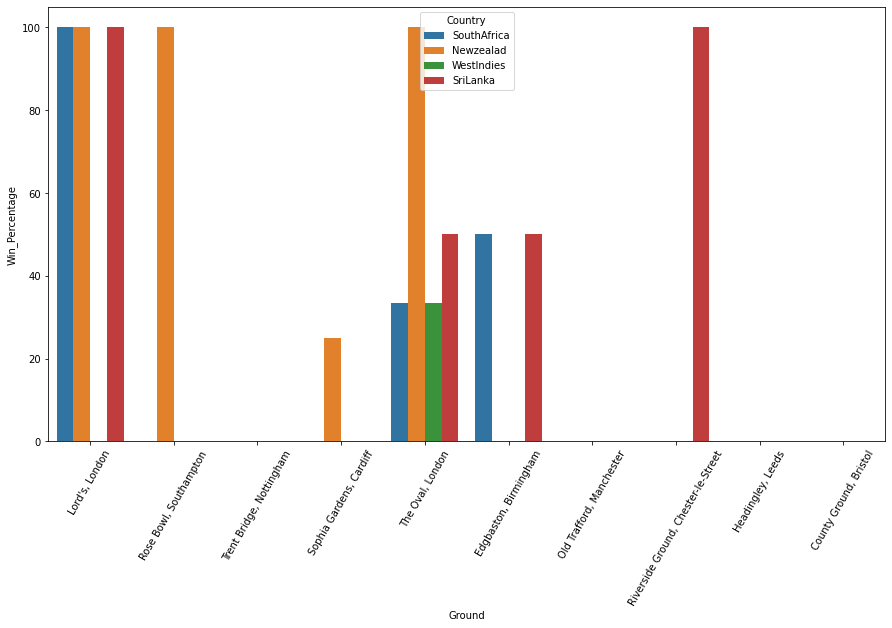

In [133]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["SouthAfrica","Newzealad","WestIndies","SriLanka"])
plt.xticks(rotation = 60)

### Best Batsman who gonna perform well in WC 2019

1. Batsmen with Average above 40
2. Batsmen with Best Strike Rate
3. Batsmen with Highest No.Of Fours, Sixers